### Import Data

In [1]:
import boto3
import sagemaker
import pandas as pd
import numpy as np

sess = sagemaker.Session()
bucket = sess.default_bucket()
role = sagemaker.get_execution_role()
region = boto3.Session().region_name

s3_transactions_combined_path = "s3://ads508sanjay/transactions_combined.csv"

In [2]:
s3_client = boto3.client("s3")

BUCKET='ads508sanjay'
KEY='transactions_combined.csv'

response = s3_client.get_object(Bucket=BUCKET, Key=KEY)
df_transactions_combined = pd.read_csv(response.get("Body"))

In [3]:
df_transactions_combined.head()

,t_dat,customer_id,article_id,price,sales_channel_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,...,section_name,garment_group_no,garment_group_name,detail_desc,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,7/26/19,f130606dcf9f69da0c23d61a21957f88c19debf15d7e0f...,741220004,0.005068,1,741220,Maria Shorts.,274,Shorts,Garment Lower body,...,Divided Basics,1002,Jersey Basic,Short shorts in lightweight sweatshirt fabric ...,NaN,NaN,ACTIVE,NONE,20.0,5fb9d1e1aa0193a227da2d0d1531c2851777dbd9f6b8b8...
1,1/31/20,3fa3367e7c72c440fd9ef4563b233bc9e877db2f28fade...,804750002,0.015237,2,804750,Charlotte Padded Milano Cradle,306,Bra,Underwear,...,Womens Lingerie,1017,"Under-, Nightwear","Lace bra with underwired, padded cups that sha...",1.0,1.0,ACTIVE,Regularly,18.0,326462f4d7add11ad4bad886ca8ccd7a22d0aeca51b719...
2,1/4/20,43454a2c49ebf0c98834cee9185f01b0f763e1af1087e5...,812683003,0.050831,1,812683,Notting Hill,265,Dress,Garment Full body,...,Womens Everyday Collection,1013,Dresses Ladies,"Long dress in an airy weave with a round, gath...",NaN,NaN,ACTIVE,NONE,32.0,7864d53926434725636c8c550ad149c742df5252949724...
3,1/11/20,2421500a485100574700923072d3769b7b8f966c7073f4...,748269003,0.025407,1,748269,Laura short sleeve polo,254,Top,Garment Upper body,...,Womens Tailoring,1003,Knitwear,"Jumper in a soft, fine-knit viscose blend with...",NaN,NaN,ACTIVE,NONE,44.0,66436f5dfbcbc6a5ce99a2de6f30d7d1a7189e09d3194b...
4,5/28/19,14225dc6d582044a43a6a0ef9191ca51ac06b870960be5...,608213007,0.033881,2,608213,ED Sorrel dress,265,Dress,Garment Full body,...,H&M+,1010,Blouses,Straight-cut dress in a soft viscose weave wit...,NaN,NaN,ACTIVE,NONE,48.0,bb07257a124699953138300becad8e437b0884f5b7c3bb...


### Type Transformation

In [4]:
df_transactions_combined.dtypes

t_dat                            object
customer_id                      object
article_id                        int64
price                           float64
sales_channel_id                  int64
product_code                      int64
prod_name                        object
product_type_no                   int64
product_type_name                object
product_group_name               object
graphical_appearance_no           int64
graphical_appearance_name        object
colour_group_code                 int64
colour_group_name                object
perceived_colour_value_id         int64
perceived_colour_value_name      object
perceived_colour_master_id        int64
perceived_colour_master_name     object
department_no                     int64
department_name                  object
index_code                       object
index_name                       object
index_group_no                    int64
index_group_name                 object
section_no                        int64


In [5]:
df_transactions_combined['article_id'] = df_transactions_combined['article_id'].astype('str')
df_transactions_combined['sales_channel_id'] = df_transactions_combined['sales_channel_id'].astype('str')
df_transactions_combined['product_code'] = df_transactions_combined['product_code'].astype('str')
df_transactions_combined['product_type_no'] = df_transactions_combined['product_type_no'].astype('str')
df_transactions_combined['colour_group_code'] = df_transactions_combined['colour_group_code'].astype('str')
df_transactions_combined['graphical_appearance_no'] = df_transactions_combined['graphical_appearance_no'].astype('str')
df_transactions_combined['perceived_colour_value_id'] = df_transactions_combined['perceived_colour_value_id'].astype('str')
df_transactions_combined['perceived_colour_master_id'] = df_transactions_combined['perceived_colour_master_id'].astype('str')
df_transactions_combined['department_no'] = df_transactions_combined['department_no'].astype('str')
df_transactions_combined['index_code'] = df_transactions_combined['index_code'].astype('str')
df_transactions_combined['index_group_no'] = df_transactions_combined['index_group_no'].astype('str')
df_transactions_combined['section_no'] = df_transactions_combined['section_no'].astype('str')
df_transactions_combined['garment_group_no'] = df_transactions_combined['garment_group_no'].astype('str')
df_transactions_combined['FN'] = df_transactions_combined['FN'].astype('category')
df_transactions_combined['Active'] = df_transactions_combined['Active'].astype('category')
df_transactions_combined['club_member_status'] = df_transactions_combined['club_member_status'].astype('category')
df_transactions_combined['fashion_news_frequency'] = df_transactions_combined['fashion_news_frequency'].astype('category')

In [6]:
df_transactions_combined.dtypes

t_dat                             object
customer_id                       object
article_id                        object
price                            float64
sales_channel_id                  object
product_code                      object
prod_name                         object
product_type_no                   object
product_type_name                 object
product_group_name                object
graphical_appearance_no           object
graphical_appearance_name         object
colour_group_code                 object
colour_group_name                 object
perceived_colour_value_id         object
perceived_colour_value_name       object
perceived_colour_master_id        object
perceived_colour_master_name      object
department_no                     object
department_name                   object
index_code                        object
index_name                        object
index_group_no                    object
index_group_name                  object
section_no      

### Data Preperation

In [7]:
#Copy the dataframe so if you make any mistakes we can easily revert the changes
df_transact = df_transactions_combined

In [8]:
df_transact.head()

,t_dat,customer_id,article_id,price,sales_channel_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,...,section_name,garment_group_no,garment_group_name,detail_desc,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,7/26/19,f130606dcf9f69da0c23d61a21957f88c19debf15d7e0f...,741220004,0.005068,1,741220,Maria Shorts.,274,Shorts,Garment Lower body,...,Divided Basics,1002,Jersey Basic,Short shorts in lightweight sweatshirt fabric ...,NaN,NaN,ACTIVE,NONE,20.0,5fb9d1e1aa0193a227da2d0d1531c2851777dbd9f6b8b8...
1,1/31/20,3fa3367e7c72c440fd9ef4563b233bc9e877db2f28fade...,804750002,0.015237,2,804750,Charlotte Padded Milano Cradle,306,Bra,Underwear,...,Womens Lingerie,1017,"Under-, Nightwear","Lace bra with underwired, padded cups that sha...",1.0,1.0,ACTIVE,Regularly,18.0,326462f4d7add11ad4bad886ca8ccd7a22d0aeca51b719...
2,1/4/20,43454a2c49ebf0c98834cee9185f01b0f763e1af1087e5...,812683003,0.050831,1,812683,Notting Hill,265,Dress,Garment Full body,...,Womens Everyday Collection,1013,Dresses Ladies,"Long dress in an airy weave with a round, gath...",NaN,NaN,ACTIVE,NONE,32.0,7864d53926434725636c8c550ad149c742df5252949724...
3,1/11/20,2421500a485100574700923072d3769b7b8f966c7073f4...,748269003,0.025407,1,748269,Laura short sleeve polo,254,Top,Garment Upper body,...,Womens Tailoring,1003,Knitwear,"Jumper in a soft, fine-knit viscose blend with...",NaN,NaN,ACTIVE,NONE,44.0,66436f5dfbcbc6a5ce99a2de6f30d7d1a7189e09d3194b...
4,5/28/19,14225dc6d582044a43a6a0ef9191ca51ac06b870960be5...,608213007,0.033881,2,608213,ED Sorrel dress,265,Dress,Garment Full body,...,H&M+,1010,Blouses,Straight-cut dress in a soft viscose weave wit...,NaN,NaN,ACTIVE,NONE,48.0,bb07257a124699953138300becad8e437b0884f5b7c3bb...


##### Change format of the price variable

In [9]:
df_transact['price'] = round(df_transact['price']*100,2)

In [10]:
df_transact.head()

,t_dat,customer_id,article_id,price,sales_channel_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,...,section_name,garment_group_no,garment_group_name,detail_desc,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,7/26/19,f130606dcf9f69da0c23d61a21957f88c19debf15d7e0f...,741220004,0.51,1,741220,Maria Shorts.,274,Shorts,Garment Lower body,...,Divided Basics,1002,Jersey Basic,Short shorts in lightweight sweatshirt fabric ...,NaN,NaN,ACTIVE,NONE,20.0,5fb9d1e1aa0193a227da2d0d1531c2851777dbd9f6b8b8...
1,1/31/20,3fa3367e7c72c440fd9ef4563b233bc9e877db2f28fade...,804750002,1.52,2,804750,Charlotte Padded Milano Cradle,306,Bra,Underwear,...,Womens Lingerie,1017,"Under-, Nightwear","Lace bra with underwired, padded cups that sha...",1.0,1.0,ACTIVE,Regularly,18.0,326462f4d7add11ad4bad886ca8ccd7a22d0aeca51b719...
2,1/4/20,43454a2c49ebf0c98834cee9185f01b0f763e1af1087e5...,812683003,5.08,1,812683,Notting Hill,265,Dress,Garment Full body,...,Womens Everyday Collection,1013,Dresses Ladies,"Long dress in an airy weave with a round, gath...",NaN,NaN,ACTIVE,NONE,32.0,7864d53926434725636c8c550ad149c742df5252949724...
3,1/11/20,2421500a485100574700923072d3769b7b8f966c7073f4...,748269003,2.54,1,748269,Laura short sleeve polo,254,Top,Garment Upper body,...,Womens Tailoring,1003,Knitwear,"Jumper in a soft, fine-knit viscose blend with...",NaN,NaN,ACTIVE,NONE,44.0,66436f5dfbcbc6a5ce99a2de6f30d7d1a7189e09d3194b...
4,5/28/19,14225dc6d582044a43a6a0ef9191ca51ac06b870960be5...,608213007,3.39,2,608213,ED Sorrel dress,265,Dress,Garment Full body,...,H&M+,1010,Blouses,Straight-cut dress in a soft viscose weave wit...,NaN,NaN,ACTIVE,NONE,48.0,bb07257a124699953138300becad8e437b0884f5b7c3bb...


#### Check for Null Values

In [11]:
df_transact.isnull().sum()

t_dat                                0
customer_id                          0
article_id                           0
price                                0
sales_channel_id                     0
product_code                         0
prod_name                            0
product_type_no                      0
product_type_name                    0
product_group_name                   0
graphical_appearance_no              0
graphical_appearance_name            0
colour_group_code                    0
colour_group_name                    0
perceived_colour_value_id            0
perceived_colour_value_name          0
perceived_colour_master_id           0
perceived_colour_master_name         0
department_no                        0
department_name                      0
index_code                           0
index_name                           0
index_group_no                       0
index_group_name                     0
section_no                           0
section_name             

In [12]:
df_transact[df_transact['detail_desc'].isnull()]

,t_dat,customer_id,article_id,price,sales_channel_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,...,section_name,garment_group_no,garment_group_name,detail_desc,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
377,7/11/19,a03e4810844ed67259d441d9098ace49a256f2bee990ce...,637268009,2.20,1,637268,April,275,Skirt,Garment Lower body,...,Womens Tailoring,1012,Skirts,NaN,NaN,NaN,ACTIVE,NONE,25.0,57ab0b63708a2ee90b02c5f91ca1bb78892af92b92bb02...
389,1/4/19,456802750dd9b215eb5eb207d138f6701a20951a38decd...,637268006,2.71,1,637268,April,275,Skirt,Garment Lower body,...,Womens Tailoring,1012,Skirts,NaN,1.0,1.0,ACTIVE,Regularly,48.0,842d0daf5bf835bb0761ba3f36df92e4a25ef1e4db6eb7...
422,5/16/19,44399a10e503691e59dea376047b918eac5733ece08b38...,742916001,0.85,2,742916,C Antibes Tie Tanga,59,Swimwear bottom,Swimwear,...,"Womens Swimwear, beachwear",1018,Swimwear,NaN,1.0,1.0,ACTIVE,Regularly,55.0,306e702fff17bd200230bee48d1fbd6702db71b52be22a...
531,5/28/19,385a1a15e36a18571ad9748952c24a0e90b51d737c9014...,742916003,0.85,2,742916,C Antibes Tie Tanga,59,Swimwear bottom,Swimwear,...,"Womens Swimwear, beachwear",1018,Swimwear,NaN,1.0,1.0,ACTIVE,Regularly,19.0,7f634c15a5c9edf0b056dd7b5e98d011519485cec0b883...
767,7/1/19,0785996d681149d11a659aaee406948b789c022dcef7ce...,721928003,2.89,2,721928,Boston set,274,Shorts,Garment Lower body,...,Young Boy,1025,Shorts,NaN,1.0,1.0,ACTIVE,Regularly,28.0,c12aad97dad23164302fcf4f95ea3805430f83d9453492...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199398,10/17/18,afb552c15735a620fffc035765c77e072d424ea7fedeb2...,567993041,1.35,2,567993,IZZY loose tee (1),255,T-shirt,Garment Upper body,...,Ladies H&M Sport,1005,Jersey Fancy,NaN,1.0,1.0,ACTIVE,Regularly,35.0,76045cc82a76e1edfb1ce8f821fd9bd68a9c71249bf93b...
199468,7/31/19,a52d91c9d8d2d570a7ff5b35c39ea30de399429752051e...,507883009,1.35,1,507883,Ellen Thong (Malva) L 3pk,286,Underwear bottom,Underwear,...,Womens Lingerie,1017,"Under-, Nightwear",NaN,1.0,1.0,ACTIVE,Regularly,25.0,fb42cbb09a8514d3f42092aec04e980ddeb4d566c00052...
199496,3/10/19,b17d6cd1fb2a6cbe650069d4544b168640982243063b8d...,663518002,1.35,1,663518,Lily Thong (Malva) 3pk,286,Underwear bottom,Underwear,...,Womens Lingerie,1017,"Under-, Nightwear",NaN,NaN,NaN,ACTIVE,NONE,29.0,2483232169259769eaeb8801c60982a288ffbfe0869d02...
199821,5/24/19,4eeb35b6d41d726e522a597e71a03d17f5af616878ef43...,742916003,0.63,2,742916,C Antibes Tie Tanga,59,Swimwear bottom,Swimwear,...,"Womens Swimwear, beachwear",1018,Swimwear,NaN,NaN,NaN,ACTIVE,NONE,53.0,fa97b04ccc761ab93d1a4b2742caa918f9e6f3a0a781a5...


In [13]:
df_transact[df_transact['age'].isnull()]

,t_dat,customer_id,article_id,price,sales_channel_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,...,section_name,garment_group_no,garment_group_name,detail_desc,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
105,10/27/18,27092d5a964df1f4893a3f6e0485ccd8ff57ea411610d4...,661306001,1.69,1,661306,Enter treggings,272,Trousers,Garment Lower body,...,Womens Everyday Collection,1009,Trousers,"Treggings in stretch twill with a high, elasti...",NaN,NaN,ACTIVE,NONE,NaN,b08146a15454bdb7585030136de6498e58b6564c8c9e52...
351,2/20/20,b33331d950959d00084ccb71164790ef8ed54498b5dc29...,822238001,2.16,1,822238,Kottla,252,Sweater,Garment Upper body,...,"Womens Nightwear, Socks & Tigh",1017,"Under-, Nightwear",Fitted top in heavily draping ribbed jersey ma...,NaN,NaN,ACTIVE,NONE,NaN,0d3c4db87face5e2293c6405d9c15859669505a0dde0db...
626,3/28/19,9ee3c40053bf88912a08b837d635d7c4e8436e88bdc264...,399256005,1.44,1,399256,Skinny Ankle R.W Brooklyn,272,Trousers,Garment Lower body,...,Ladies Denim,1016,Trousers Denim,Ankle-length jeans in washed stretch denim wit...,NaN,NaN,ACTIVE,NONE,NaN,36de74f9e73a515052cba9e80801d11c446cde06625c50...
769,6/12/20,9f3114681455cd217e1a7038d08572a99527b13838099e...,814817001,5.08,2,814817,DIV Miley boho dress,265,Dress,Garment Full body,...,Divided Projects,1001,Unknown,Short dress in woven fabric with a round neckl...,NaN,NaN,ACTIVE,NONE,NaN,695d11e7aee4dca727f8a9bc0601e17330f8e5c92b16bf...
1055,2/22/19,bd8ab182202228868b335dcef4086daaa64f3ca445a1cc...,717879014,4.32,1,717879,Dalston blazer,264,Blazer,Garment Upper body,...,Womens Everyday Collection,1008,Dressed,"Longer-style, double-breasted jacket in woven ...",NaN,NaN,ACTIVE,NONE,NaN,f829b180ad362c96eb0dad3fd1a9a6512f4ea49898a2f1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198611,5/25/20,be9b9a930cdebd679ae57ce8edd78da69883b7af0d8d2f...,819373001,3.39,2,819373,Justin swim sandal SB,88,Flip flop,Shoes,...,Kids & Baby Shoes,1020,Shoes,Sandals in scuba fabric. Adjustable straps wit...,NaN,NaN,ACTIVE,NONE,NaN,d2d30b55b06625b1b682133a9d2f35f88868954494de1f...
198961,11/10/18,0ce8a02e28ce0abdbb3445000d6ee9cb8de13737c6d316...,669361001,4.24,2,669361,Jupiter dress,265,Dress,Garment Full body,...,Divided Projects,1013,Dresses Ladies,Short dress in printed jersey with short sleev...,NaN,NaN,PRE-CREATE,NONE,NaN,444c752f336f10ac3c71b7b0c7c3a86bdd6ff76b4da4cf...
199024,7/28/20,c71b9ae852389f17469161bd570e2892a2f64bb5d7f66f...,874676001,1.69,2,874676,Savage L/S dress,265,Dress,Garment Full body,...,Divided Collection,1013,Dresses Ladies,Short dress in a crêpe weave with a round neck...,NaN,NaN,PRE-CREATE,NONE,NaN,c71ee63f2953747e7efc9af2bc65ffb5aeee333681bb23...
199193,1/30/20,a033eac601b83aaa85988649b26a91a2692e8e8cbdea23...,814306003,4.14,2,814306,ALGOT 5-p body,256,Bodysuit,Garment Upper body,...,Baby Essentials & Complements,1005,Jersey Fancy,Long-sleeved bodysuits in soft organic cotton ...,1.0,1.0,ACTIVE,Regularly,NaN,fad8f0b3b487b44e461f99c052a6a755d5f017bc8f55f3...


#### Remove Null Values

In [14]:
df_transact = df_transact.dropna(subset=['age', 'detail_desc'])

In [15]:
df_transact.isnull().sum()

t_dat                                0
customer_id                          0
article_id                           0
price                                0
sales_channel_id                     0
product_code                         0
prod_name                            0
product_type_no                      0
product_type_name                    0
product_group_name                   0
graphical_appearance_no              0
graphical_appearance_name            0
colour_group_code                    0
colour_group_name                    0
perceived_colour_value_id            0
perceived_colour_value_name          0
perceived_colour_master_id           0
perceived_colour_master_name         0
department_no                        0
department_name                      0
index_code                           0
index_name                           0
index_group_no                       0
index_group_name                     0
section_no                           0
section_name             

In [16]:
df_transact.head(20)

,t_dat,customer_id,article_id,price,sales_channel_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,...,section_name,garment_group_no,garment_group_name,detail_desc,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,7/26/19,f130606dcf9f69da0c23d61a21957f88c19debf15d7e0f...,741220004,0.51,1,741220,Maria Shorts.,274,Shorts,Garment Lower body,...,Divided Basics,1002,Jersey Basic,Short shorts in lightweight sweatshirt fabric ...,NaN,NaN,ACTIVE,NONE,20.0,5fb9d1e1aa0193a227da2d0d1531c2851777dbd9f6b8b8...
1,1/31/20,3fa3367e7c72c440fd9ef4563b233bc9e877db2f28fade...,804750002,1.52,2,804750,Charlotte Padded Milano Cradle,306,Bra,Underwear,...,Womens Lingerie,1017,"Under-, Nightwear","Lace bra with underwired, padded cups that sha...",1.0,1.0,ACTIVE,Regularly,18.0,326462f4d7add11ad4bad886ca8ccd7a22d0aeca51b719...
2,1/4/20,43454a2c49ebf0c98834cee9185f01b0f763e1af1087e5...,812683003,5.08,1,812683,Notting Hill,265,Dress,Garment Full body,...,Womens Everyday Collection,1013,Dresses Ladies,"Long dress in an airy weave with a round, gath...",NaN,NaN,ACTIVE,NONE,32.0,7864d53926434725636c8c550ad149c742df5252949724...
3,1/11/20,2421500a485100574700923072d3769b7b8f966c7073f4...,748269003,2.54,1,748269,Laura short sleeve polo,254,Top,Garment Upper body,...,Womens Tailoring,1003,Knitwear,"Jumper in a soft, fine-knit viscose blend with...",NaN,NaN,ACTIVE,NONE,44.0,66436f5dfbcbc6a5ce99a2de6f30d7d1a7189e09d3194b...
4,5/28/19,14225dc6d582044a43a6a0ef9191ca51ac06b870960be5...,608213007,3.39,2,608213,ED Sorrel dress,265,Dress,Garment Full body,...,H&M+,1010,Blouses,Straight-cut dress in a soft viscose weave wit...,NaN,NaN,ACTIVE,NONE,48.0,bb07257a124699953138300becad8e437b0884f5b7c3bb...
5,11/26/18,015d296b8be07e904ec2b84cd34627e409597af835f743...,695398001,4.24,2,695398,Marseille,262,Jacket,Garment Upper body,...,Womens Jackets,1007,Outdoor,"Short, pattern-weave trenchcoat with notch lap...",1.0,1.0,ACTIVE,Regularly,25.0,92feacb6993f89e54ed3a53deb9c76945ee2fb4aa20bf2...
6,9/26/18,4d6e809f59b6e592d35c2998535cfed1da27fb29541f14...,535783001,5.25,2,535783,Drums,264,Blazer,Garment Upper body,...,Womens Tailoring,1008,Dressed,Short jacket in textured fabric with raw fring...,NaN,NaN,ACTIVE,NONE,27.0,fcb54550e33c08da08a0899ff07579f56d30dc347e9743...
7,3/28/19,a44899e4112056655eb523f0a1efc7906ca2b82e6a5038...,502224001,5.08,2,502224,Duffy,87,Boots,Shoes,...,Womens Shoes,1020,Shoes,Warm-lined Chelsea boots with elastic gores in...,NaN,NaN,ACTIVE,NONE,21.0,c3a387ad168049a6b704a89015bab8ac93306938993d38...
8,6/2/19,15972b176a3ba803af38123bf700b7473565654e6a1762...,708021001,1.69,2,708021,PINKY Loose Fitted Tank,253,Vest top,Garment Upper body,...,Ladies H&M Sport,1005,Jersey Fancy,Loose-fitting sports vest top in fast-drying j...,NaN,NaN,ACTIVE,NONE,28.0,8b7665d16552fac2395f271f8c474acb66a288d4cd39c7...
9,6/16/20,a1124b22110bd68f653c9da56b49f15e608b901cb12a0e...,809961002,2.54,2,809961,CINDY tights conscious,273,Leggings/Tights,Garment Lower body,...,Ladies H&M Sport,1005,Jersey Fancy,Sports tights in fast-drying functional fabric...,1.0,1.0,ACTIVE,Regularly,31.0,7db19712ceec87860523dd802a75d0f7847da37c92f449...


#### Rebalance Dataset

In [17]:
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [18]:
sns.set_style = "seaborn-whitegrid"

sns.set(
    rc={
        "font.style": "normal",
        "axes.facecolor": "white",
        "grid.color": ".8",
        "grid.linestyle": "-",
        "figure.facecolor": "white",
        "figure.titlesize": 20,
        "text.color": "black",
        "xtick.color": "black",
        "ytick.color": "black",
        "axes.labelcolor": "black",
        "axes.grid": True,
        "axes.labelsize": 10,
        "xtick.labelsize": 10,
        "font.size": 10,
        "ytick.labelsize": 10,
    }
)


In [19]:
def show_values_barplot(axs, space):
    def _show_on_plot(ax):
        for p in ax.patches:
            _x = p.get_x() + p.get_width() + float(space)
            _y = p.get_y() + p.get_height()
            value = round(float(p.get_width()), 2)
            ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_plot(ax)
    else:
        _show_on_plot(axs)


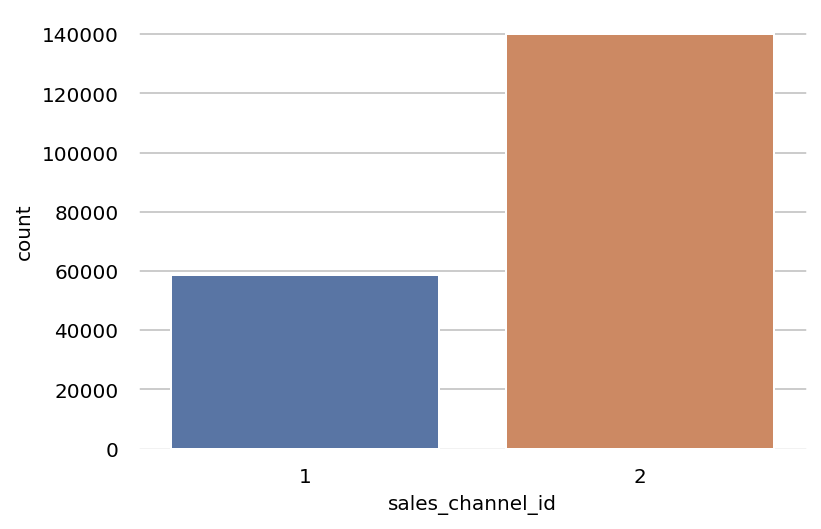

In [20]:
saleschannel_viz = sns.countplot(x="sales_channel_id", data=df_transact)

In [21]:
count_class_2, count_class_1 = df_transact.sales_channel_id.value_counts()

# Divide by class
df_class_1 = df_transact[df_transact['sales_channel_id'] == "1"]
df_class_2 = df_transact[df_transact['sales_channel_id'] == "2"]

In [22]:
count_class_2


139924

In [23]:
count_class_1

58510

Random over-sampling:
1    139924
2    139924
Name: sales_channel_id, dtype: int64


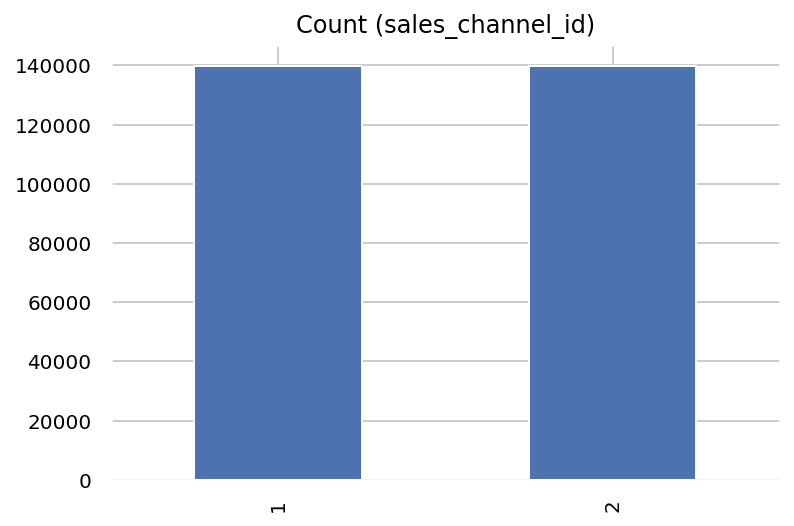

In [24]:
df_class_1_over = df_class_1.sample(count_class_2, replace=True)
df_test_over = pd.concat([df_class_2, df_class_1_over], axis=0)
print('Random over-sampling:')
print(df_test_over.sales_channel_id.value_counts())

df_test_over.sales_channel_id.value_counts().plot(kind='bar', title='Count (sales_channel_id)');


In [25]:
df_rebalanced = df_test_over

In [26]:
df_rebalanced.head(10)

,t_dat,customer_id,article_id,price,sales_channel_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,...,section_name,garment_group_no,garment_group_name,detail_desc,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
1,1/31/20,3fa3367e7c72c440fd9ef4563b233bc9e877db2f28fade...,804750002,1.52,2,804750,Charlotte Padded Milano Cradle,306,Bra,Underwear,...,Womens Lingerie,1017,"Under-, Nightwear","Lace bra with underwired, padded cups that sha...",1.0,1.0,ACTIVE,Regularly,18.0,326462f4d7add11ad4bad886ca8ccd7a22d0aeca51b719...
4,5/28/19,14225dc6d582044a43a6a0ef9191ca51ac06b870960be5...,608213007,3.39,2,608213,ED Sorrel dress,265,Dress,Garment Full body,...,H&M+,1010,Blouses,Straight-cut dress in a soft viscose weave wit...,NaN,NaN,ACTIVE,NONE,48.0,bb07257a124699953138300becad8e437b0884f5b7c3bb...
5,11/26/18,015d296b8be07e904ec2b84cd34627e409597af835f743...,695398001,4.24,2,695398,Marseille,262,Jacket,Garment Upper body,...,Womens Jackets,1007,Outdoor,"Short, pattern-weave trenchcoat with notch lap...",1.0,1.0,ACTIVE,Regularly,25.0,92feacb6993f89e54ed3a53deb9c76945ee2fb4aa20bf2...
6,9/26/18,4d6e809f59b6e592d35c2998535cfed1da27fb29541f14...,535783001,5.25,2,535783,Drums,264,Blazer,Garment Upper body,...,Womens Tailoring,1008,Dressed,Short jacket in textured fabric with raw fring...,NaN,NaN,ACTIVE,NONE,27.0,fcb54550e33c08da08a0899ff07579f56d30dc347e9743...
7,3/28/19,a44899e4112056655eb523f0a1efc7906ca2b82e6a5038...,502224001,5.08,2,502224,Duffy,87,Boots,Shoes,...,Womens Shoes,1020,Shoes,Warm-lined Chelsea boots with elastic gores in...,NaN,NaN,ACTIVE,NONE,21.0,c3a387ad168049a6b704a89015bab8ac93306938993d38...
8,6/2/19,15972b176a3ba803af38123bf700b7473565654e6a1762...,708021001,1.69,2,708021,PINKY Loose Fitted Tank,253,Vest top,Garment Upper body,...,Ladies H&M Sport,1005,Jersey Fancy,Loose-fitting sports vest top in fast-drying j...,NaN,NaN,ACTIVE,NONE,28.0,8b7665d16552fac2395f271f8c474acb66a288d4cd39c7...
9,6/16/20,a1124b22110bd68f653c9da56b49f15e608b901cb12a0e...,809961002,2.54,2,809961,CINDY tights conscious,273,Leggings/Tights,Garment Lower body,...,Ladies H&M Sport,1005,Jersey Fancy,Sports tights in fast-drying functional fabric...,1.0,1.0,ACTIVE,Regularly,31.0,7db19712ceec87860523dd802a75d0f7847da37c92f449...
10,5/7/20,71e1a48e21e0451ffbf6081fa8b2dbb5b7870fdf1d6a0d...,835008003,3.81,2,835008,Avignon,264,Blazer,Garment Upper body,...,Womens Everyday Collection,1008,Dressed,"Straight-cut, double-breasted jacket in woven ...",1.0,1.0,ACTIVE,Regularly,56.0,554fdfbb6753b75622e50140fa87edb6732b0d89e68d9d...
12,5/12/19,e9d3056258e570ad10e2d21c92daace2689889fcee5913...,685429001,3.13,2,685429,Rose,265,Dress,Garment Full body,...,Womens Everyday Collection,1013,Dresses Ladies,Straight-cut dress in a viscose weave with a b...,1.0,1.0,ACTIVE,Regularly,58.0,abda022cb6ee905b07f48a0816911f91d0489481a7b419...
14,7/2/19,6ca0fd85ca525be2fc5e2b37adada5fab454ebb815a3a5...,581298005,1.61,2,581298,Patty flip-flop,88,Flip flop,Shoes,...,Womens Shoes,1020,Shoes,Flip-flops with rubber straps and soles.,1.0,1.0,ACTIVE,Regularly,27.0,f40ec4137814b6ab64fadc90991e935173bb0679a94188...


#### Hot Encoding

In [27]:
from sklearn.preprocessing import OneHotEncoder

In [28]:
one_hot_encoder = OneHotEncoder(sparse=False, drop = "first")# dropping first to avoid dummy variable trap

In [41]:
categorical_vars =['garment_group_name']

In [42]:
encoder_vars_array = one_hot_encoder.fit_transform(df_rebalanced[categorical_vars])

In [43]:
encoder_feature_names = one_hot_encoder.get_feature_names(categorical_vars)

In [44]:
df_categorical=pd.DataFrame(encoder_vars_array,columns = encoder_feature_names)

In [45]:
df_categorical=pd.DataFrame(encoder_vars_array,columns = encoder_feature_names)

In [50]:
df_categorical.head()

,garment_group_name_Blouses,garment_group_name_Dressed,garment_group_name_Dresses Ladies,garment_group_name_Dresses/Skirts girls,garment_group_name_Jersey Basic,garment_group_name_Jersey Fancy,garment_group_name_Knitwear,garment_group_name_Outdoor,garment_group_name_Shirts,garment_group_name_Shoes,garment_group_name_Shorts,garment_group_name_Skirts,garment_group_name_Socks and Tights,garment_group_name_Special Offers,garment_group_name_Swimwear,garment_group_name_Trousers,garment_group_name_Trousers Denim,"garment_group_name_Under-, Nightwear",garment_group_name_Unknown,garment_group_name_Woven/Jersey/Knitted mix Baby
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


######## Below line may take a couple of minutes

In [51]:
df_final = pd.concat([df_rebalanced.reset_index(drop=True), df_categorical.reset_index(drop=True)], axis = 1)

In [52]:
df_final.head()

,t_dat,customer_id,article_id,price,sales_channel_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,...,garment_group_name_Shorts,garment_group_name_Skirts,garment_group_name_Socks and Tights,garment_group_name_Special Offers,garment_group_name_Swimwear,garment_group_name_Trousers,garment_group_name_Trousers Denim,"garment_group_name_Under-, Nightwear",garment_group_name_Unknown,garment_group_name_Woven/Jersey/Knitted mix Baby
0,1/31/20,3fa3367e7c72c440fd9ef4563b233bc9e877db2f28fade...,804750002,1.52,2,804750,Charlotte Padded Milano Cradle,306,Bra,Underwear,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,5/28/19,14225dc6d582044a43a6a0ef9191ca51ac06b870960be5...,608213007,3.39,2,608213,ED Sorrel dress,265,Dress,Garment Full body,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,11/26/18,015d296b8be07e904ec2b84cd34627e409597af835f743...,695398001,4.24,2,695398,Marseille,262,Jacket,Garment Upper body,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9/26/18,4d6e809f59b6e592d35c2998535cfed1da27fb29541f14...,535783001,5.25,2,535783,Drums,264,Blazer,Garment Upper body,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3/28/19,a44899e4112056655eb523f0a1efc7906ca2b82e6a5038...,502224001,5.08,2,502224,Duffy,87,Boots,Shoes,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Split Test and Training Dataset

In [53]:
from sklearn.model_selection import train_test_split

In [59]:
df_trainingdata, df_testingdata = train_test_split(df_final, test_size=0.2, random_state=25)

print(f"No. of training examples: {df_trainingdata.shape[0]}")
print(f"No. of testing examples: {df_testingdata.shape[0]}")

No. of training examples: 223878
No. of testing examples: 55970


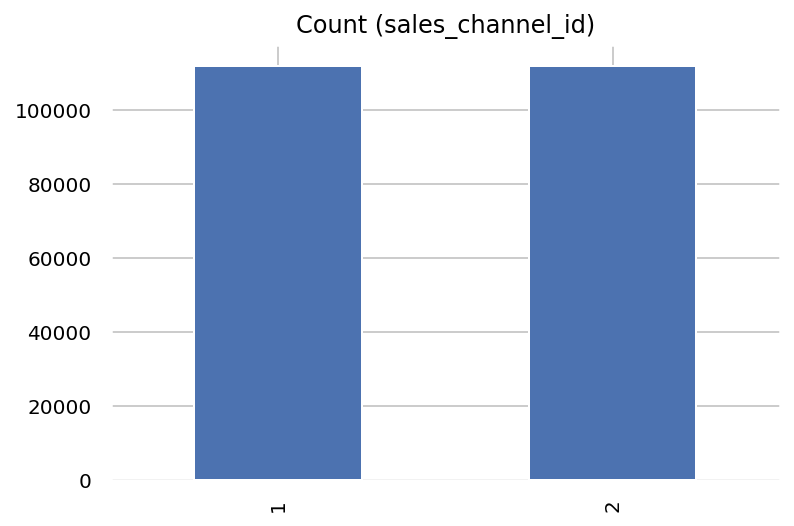

In [60]:
df_trainingdata.sales_channel_id.value_counts().plot(kind='bar', title='Count (sales_channel_id)');

In [61]:
df_trainingdata.head()

,t_dat,customer_id,article_id,price,sales_channel_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,...,garment_group_name_Shorts,garment_group_name_Skirts,garment_group_name_Socks and Tights,garment_group_name_Special Offers,garment_group_name_Swimwear,garment_group_name_Trousers,garment_group_name_Trousers Denim,"garment_group_name_Under-, Nightwear",garment_group_name_Unknown,garment_group_name_Woven/Jersey/Knitted mix Baby
196597,2/1/20,8c4f5835d2cc590ca9d0af640e1a3ef3b54d87ac1f427b...,663396001,4.58,1,663396,Manhattan blouse,258,Blouse,Garment Upper body,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
219903,8/22/19,104e14694a255704867e79d20ab10cf9907edfeab65865...,676052007,0.19,1,676052,Bunny Button Tank,253,Vest top,Garment Upper body,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41954,6/16/20,89a17fcab3af04ed81561f571323453139ca168e4cf355...,809521003,4.57,2,809521,Milla sockboot,87,Boots,Shoes,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22865,11/19/18,4328ae92e3d89afd4766da9ae7161b58e5e227dc5bfbcb...,636455003,5.08,2,636455,Jennifer (1),264,Blazer,Garment Upper body,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83949,1/22/20,78bb9b8d7172d601e656bd077943552f2fce30cb8716d2...,799417004,3.05,2,799417,Buckle Roo Triangle Top,298,Bikini top,Swimwear,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


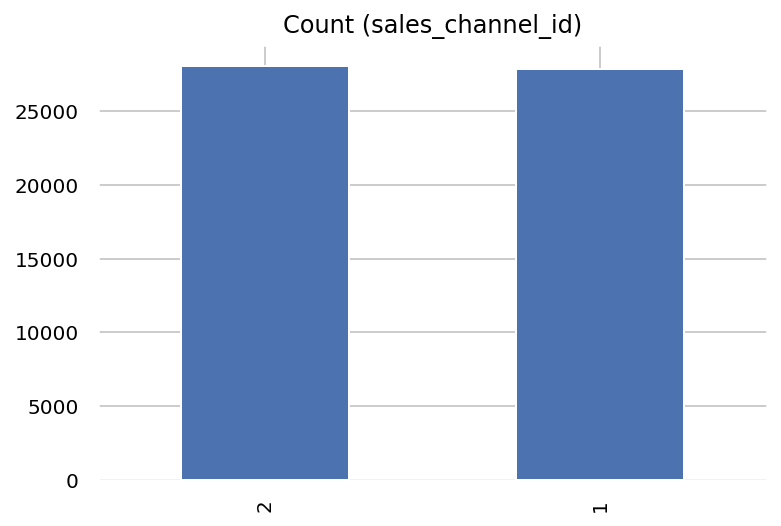

In [62]:
df_testingdata.sales_channel_id.value_counts().plot(kind='bar', title='Count (sales_channel_id)');

In [63]:
df_testingdata.head()

,t_dat,customer_id,article_id,price,sales_channel_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,...,garment_group_name_Shorts,garment_group_name_Skirts,garment_group_name_Socks and Tights,garment_group_name_Special Offers,garment_group_name_Swimwear,garment_group_name_Trousers,garment_group_name_Trousers Denim,"garment_group_name_Under-, Nightwear",garment_group_name_Unknown,garment_group_name_Woven/Jersey/Knitted mix Baby
34728,6/22/20,6592910705a5e01a3808a9bc4751e126b1e8c4e0236312...,884067001,2.20,2,884067,LUCKY SHIRT,259,Shirt,Garment Upper body,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
277344,12/6/18,65783a4a35c6fa0985a9d1d2c53660ebaba23073540fc4...,699566001,1.78,1,699566,CS FAY DRESS,265,Dress,Garment Full body,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
207265,5/21/19,74171f9d074eeb14146322ee5a4ae17741245aa5d23e0e...,778064003,0.85,1,778064,Claudine t-shirt,255,T-shirt,Garment Upper body,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
105066,1/4/19,7d2c0638ab6130efa23bb21ef8b4016e9f896af7e7b60a...,699077002,1.69,2,699077,Sweet & Bitter Mid Tie Brief,59,Swimwear bottom,Swimwear,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
125714,7/13/19,6fa2d5ebc9f8cc132df1a3c1ee0671ba16f76a527b5b5f...,717066005,2.50,2,717066,Fia longsleeve,254,Top,Garment Upper body,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
